# Обработка изображений. Часть 3.
Данные, необходимые для этого модуля:
* cat-bw.png
* cat-color.png
* coin.png

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

# %matplotlib inline — это «магическая» команда для Jupyter Notebook, которая позволяет графикам matplotlib
# отображаться прямо внутри блокнота, а не в отдельном окне.

# import matplotlib.pyplot as plt — импортируем модуль для построения графиков и отображения изображений.
# plt — это сокращение, с которым мы обращаемся к функциям matplotlib.

# import numpy as np — импортируем библиотеку NumPy, которая нужна для работы с массивами чисел,
# математических операций и обработки данных. np — это сокращение, удобное для обращения к функциям NumPy.

# import imageio — библиотека для чтения и записи изображений и видеофайлов.
# Она позволяет загружать изображения в программу и работать с ними как с массивами данных.


## Загрузка ЧБ изображения

In [21]:
# Импортируем необходимые библиотеки (предполагается, что они импортированы заранее):
# imageio — для чтения изображений,
# numpy (np) — для работы с массивами.

# Считаваем изображение из файла 'cat-bw.png' в переменную img.
# imageio.imread возвращает изображение в виде 3-мерного массива (высота x ширина x каналы).
img = imageio.imread('cat-bw.png')

# Берём только первый канал изображения (img[:,:,0]) — обычно это красный канал,
# но для черно-белого изображения все каналы одинаковые, поэтому берём один.
# Преобразуем тип данных в float32, чтобы делать вычисления с десятичными значениями.
# Делим на 255., чтобы нормализовать пиксели в диапазон от 0 до 1,
# где 0 — чёрный цвет, 1 — белый цвет.
img = img[:, :, 0].astype(np.float32) / 255.

# Выводим форму массива img — кортеж (высота, ширина).
# Это показывает размеры изображения после выборки одного канала.
print(img.shape)


(667, 730)


/tmp/ipython-input-21-2747239816.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('cat-bw.png')


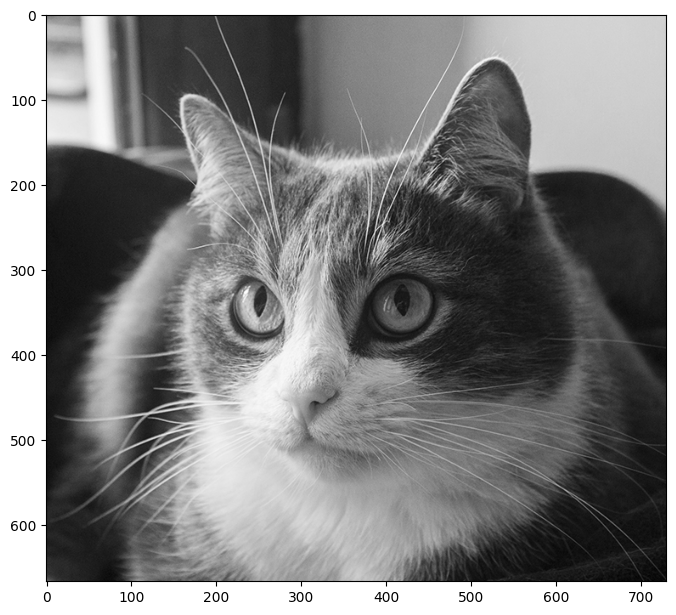

In [22]:
plt.figure(figsize=(8, 8))  # Создаёт новое окно (фигуру) для графика с размером 8 на 8 дюймов.
plt.imshow(img, cmap='gray')  # Отображает изображение, хранящееся в переменной img, в оттенках серого.
# Параметр cmap='gray' говорит, что изображение будет показано в градациях серого, а не цветное.


## Оконная функция (функция фильтра)
Фильтр производит размытие (box blur)

In [23]:
def my_filter(x):
    # Box blur
    return np.mean(x)

'''
Пояснения к коду:

def my_filter(x):               # Определение функции с именем my_filter, которая принимает один аргумент x.
                               # Обычно x — это массив чисел (например, пикселей изображения или небольшой участок изображения).

    # Box blur                # Комментарий, поясняющий, что функция реализует "box blur" — простое размытие.

    return np.mean(x)          # Функция возвращает среднее значение элементов массива x.
                              # np.mean — это функция из библиотеки NumPy, которая вычисляет среднее арифметическое.
                              # В контексте компьютерного зрения такой фильтр усредняет значения соседних пикселей,
                              # создавая эффект размытия (blur).
                              #
                              # Например, если x — это маленький блок пикселей 3x3, функция заменит каждый пиксель
                              # на среднее значение этого блока, что сгладит резкие переходы в изображении.
'''


'\nПояснения к коду:\n\ndef my_filter(x):               # Определение функции с именем my_filter, которая принимает один аргумент x.\n                               # Обычно x — это массив чисел (например, пикселей изображения или небольшой участок изображения).\n\n    # Box blur                # Комментарий, поясняющий, что функция реализует "box blur" — простое размытие.\n\n    return np.mean(x)          # Функция возвращает среднее значение элементов массива x.\n                              # np.mean — это функция из библиотеки NumPy, которая вычисляет среднее арифметическое.\n                              # В контексте компьютерного зрения такой фильтр усредняет значения соседних пикселей,\n                              # создавая эффект размытия (blur).\n                              #\n                              # Например, если x — это маленький блок пикселей 3x3, функция заменит каждый пиксель\n                              # на среднее значение этого блока, что сгладит рез

## Оконная обработка изображения (фильтрация)

In [24]:
win_size = (11, 11)  # задаём размер окна - маленькой области изображения, с которой будем работать за один раз

# создаём пустой массив out_img, в который будем записывать результаты.
# размер этого массива меньше, чем исходное изображение img, потому что мы "проходим" окном по изображению
# и не можем выйти за края.
# Размер по высоте: img.shape[0] - win_size[0] + 1, по ширине: img.shape[1] - win_size[1] + 1.
# Тип данных float32 выбран для хранения чисел с плавающей точкой (например, результатов фильтрации).
out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1),
     dtype=np.float32)

# Два вложенных цикла перебирают все возможные позиции окна по высоте (i) и ширине (j) изображения
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        # из исходного изображения img вырезаем окно размером win_size,
        # начиная с позиции (i, j) по высоте и ширине
        x = img[i:i+win_size[0], j:j+win_size[1]]

        # применяем функцию my_filter к этому окну x и записываем результат в соответствующую ячейку out_img
        # то есть, на выходе получаем обработанное изображение, где каждый пиксель - это результат работы фильтра
        out_img[i,j] = my_filter(x)


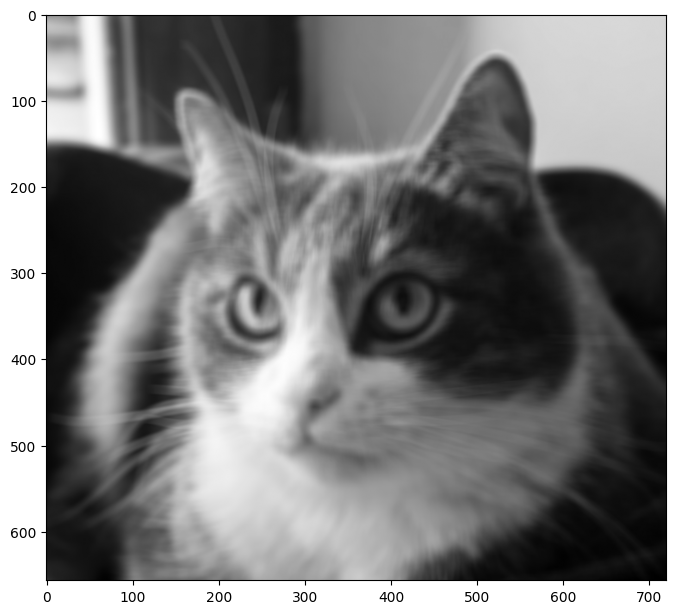

In [25]:
plt.figure(figsize=(8, 8))  # Создаём новое окно для отображения изображения с размером 8x8 дюймов.
plt.imshow(out_img, cmap='gray')  # Отображаем изображение, хранящееся в переменной out_img, используя серую цветовую схему (чёрно-белое).
# Здесь plt — это сокращение для библиотеки matplotlib.pyplot, которая служит для визуализации данных.
# figsize задаёт размер окна с картинкой, чтобы её было удобно рассмотреть.
# cmap='gray' говорит, что изображение будет отображено в оттенках серого, а не цветное.


## Создание линейного фильтра (ядро свёртки)

In [26]:
# Box blur
if 0:
    # Задаём размер окна фильтра (11x11 пикселей)
    win_size = (11, 11)
    # Создаём матрицу из единиц размера 11x11 с типом float32
    w = np.ones(win_size, dtype=np.float32)
    # Нормируем матрицу, чтобы сумма всех элементов была равна 1
    # Это нужно, чтобы при свёртке яркость изображения не менялась
    w = w / np.sum(w)

# Gaussian blur
if 1:
    # Задаём размер окна фильтра (11x11 пикселей)
    win_size = (11, 11)
    # Параметр sigma — стандартное отклонение гауссовой функции,
    # влияет на "размытие", чем больше sigma, тем сильнее размытие
    sigma = 3
    # Создаём пустую матрицу (11x11) с типом float32 для весов фильтра
    w = np.zeros(win_size, dtype=np.float32)
    # Проходим по каждому элементу матрицы
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            # Вычисляем значение гауссовой функции для каждого элемента
            # Центр окна находится в w.shape[0]//2, w.shape[1]//2
            # Формула: exp(-((x-x0)^2 + (y-y0)^2) / (2*sigma^2))
            w[i,j] = np.exp(-(i - w.shape[0]//2)**2 / (2 * sigma**2)
                            -(j - w.shape[1]//2)**2 / (2 * sigma**2))
    # Нормируем матрицу так, чтобы сумма всех элементов была 1,
    # чтобы сохранять яркость после применения фильтра
    w = w / np.sum(w)


[[0.00125904 0.0020758  0.00306252 0.00404311 0.00477637 0.00504924
  0.00477637 0.00404311 0.00306252 0.0020758  0.00125904]
 [0.0020758  0.00342242 0.00504924 0.00666597 0.00787491 0.00832479
  0.00787491 0.00666597 0.00504924 0.00342242 0.0020758 ]
 [0.00306252 0.00504924 0.00744935 0.00983457 0.01161817 0.01228189
  0.01161817 0.00983457 0.00744935 0.00504924 0.00306252]
 [0.00404311 0.00666597 0.00983457 0.01298353 0.01533823 0.01621447
  0.01533823 0.01298353 0.00983457 0.00666597 0.00404311]
 [0.00477637 0.00787491 0.01161817 0.01533823 0.01811998 0.01915513
  0.01811998 0.01533823 0.01161817 0.00787491 0.00477637]
 [0.00504924 0.00832479 0.01228189 0.01621447 0.01915513 0.02024942
  0.01915513 0.01621447 0.01228189 0.00832479 0.00504924]
 [0.00477637 0.00787491 0.01161817 0.01533823 0.01811998 0.01915513
  0.01811998 0.01533823 0.01161817 0.00787491 0.00477637]
 [0.00404311 0.00666597 0.00983457 0.01298353 0.01533823 0.01621447
  0.01533823 0.01298353 0.00983457 0.00666597 0.00

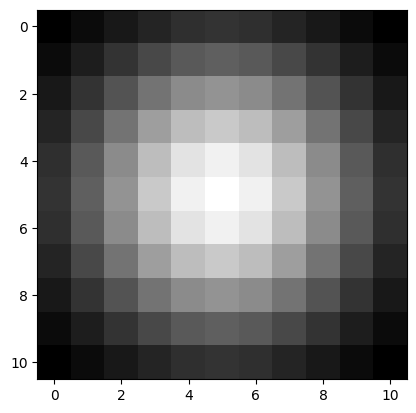

In [27]:
print(w)
# Эта команда выводит на экран содержимое переменной w.
# В зависимости от того, что хранится в w, это может быть массив чисел, матрица, изображение в числовом виде и т.д.

plt.imshow(w, cmap='gray')
# Эта команда отображает содержимое переменной w как изображение.
# plt.imshow — функция из библиотеки matplotlib.pyplot, которая визуализирует данные в виде картинки.
# Аргумент w — это данные изображения, чаще всего двумерный массив (матрица) с числовыми значениями яркости пикселей.
# Параметр cmap='gray' означает, что изображение будет отображено в градациях серого (черно-белое).
# Это удобно, если w — это, например, черно-белое изображение или карта признаков, где цвет не нужен.

# В целом, этот код выводит численные данные из w и показывает их как серое изображение.


## Свёртка изображения (линейная фильтрация)
`%%time` - измерение времени работы ячейки ноутбука

In [28]:
%%time
# Создаем выходное изображение out_img, размер которого равен:
# высота исходного изображения img минус высота шаблона w + 1
# и ширина img минус ширина шаблона w + 1.
# Это связано с тем, что мы "проходим" шаблоном по изображению без выхода за границы.
# Тип данных — float32, для точности вычислений.
out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1),
     dtype=np.float32)

# Два вложенных цикла проходят по всем позициям, куда можно "наложить" шаблон w на изображение img.
for i in range(out_img.shape[0]):  # i — вертикальная позиция (строка)
    for j in range(out_img.shape[1]):  # j — горизонтальная позиция (столбец)
        # Вырезаем из исходного изображения часть x, которая совпадает по размеру с шаблоном w,
        # начиная с позиции (i, j).
        x = img[i:i+w.shape[0], j:j+w.shape[1]]

        # Перемножаем элементы шаблона w с соответствующими элементами вырезанного блока x,
        # затем суммируем все значения.
        # Это действие — свертка (convolution) или корреляция, позволяющая определить,
        # насколько шаблон совпадает с участком изображения.
        out_img[i,j] = np.sum(w * x)


CPU times: user 3.73 s, sys: 17.1 ms, total: 3.75 s
Wall time: 3.8 s


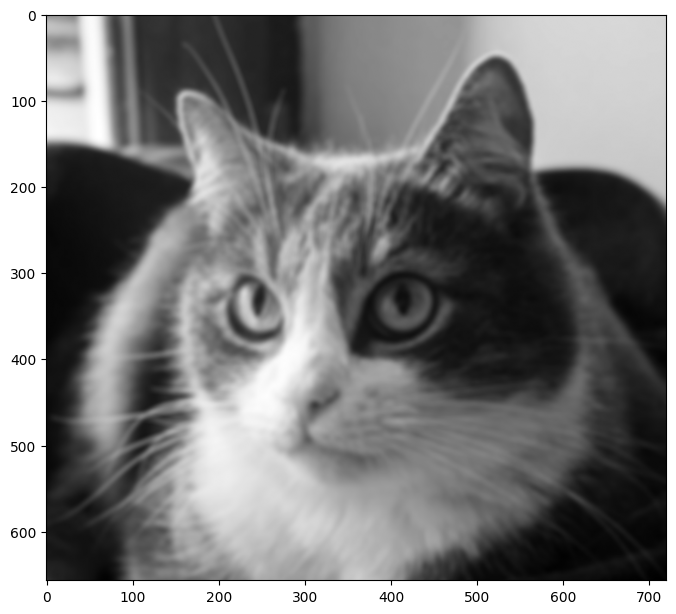

In [29]:
plt.figure(figsize=(8, 8))  # Создает новое окно с графиком размером 8 на 8 дюймов (высота и ширина)
plt.imshow(np.abs(out_img), cmap='gray')
# Отображает изображение из массива out_img на графике.
# np.abs() берет абсолютные значения элементов массива out_img,
# чтобы избавиться от возможных отрицательных чисел (важно для корректного отображения).
# cmap='gray' означает, что изображение будет отображено в оттенках серого (черно-белое).


## Свёртка через библиотеку scipy.signal
На самом деле, то, что мы делаем, называется "корреляция". Настоящая свёртка отражает ядро свёртки по всем измерениям. Но зачастую под свёрткой понимают именно корреляцию. А в случае симметричного ядра свёртки они эквивалентны.

In [30]:
import scipy.signal

# Этот код импортирует модуль scipy.signal из библиотеки SciPy.
# SciPy — это мощная библиотека для научных и инженерных расчетов на Python.
# Подмодуль signal содержит инструменты для обработки сигналов,
# такие как фильтрация, свёртка, преобразование Фурье, и многое другое.
#
# В компьютерном зрении и обработке изображений scipy.signal часто используется для:
# - применения фильтров к изображениям (например, размытие, повышение резкости),
# - обнаружения краёв с помощью свёртки с ядрами,
# - анализа частотных характеристик сигналов.
#
# Пример: фильтрация изображения с помощью ядра (маски) — это свёртка, которую реализуют
# с помощью функций из scipy.signal.
#
# Этот импорт просто подключает модуль, чтобы вы могли использовать его функции в дальнейшем коде.


In [31]:
%%time

out_img = scipy.signal.correlate2d(img, w, mode='valid')

'''
Пояснения к коду:

1. %%time
   - Это специальная "магическая" команда для Jupyter Notebook.
   - Она измеряет и выводит время выполнения следующей за ней ячейки с кодом.
   - В данном случае покажет, сколько времени заняло вычисление корреляции.

2. scipy.signal.correlate2d
   - Это функция из библиотеки SciPy (подраздел signal), которая выполняет двумерную корреляцию.
   - Корреляция — операция, при которой "окно" (фильтр) w "скользит" по изображению img, сравнивая локальные участки.
   - Результатом получается карта, где каждая точка показывает, насколько похож участок img на шаблон w.

3. img
   - Входное двумерное массивное изображение (например, черно-белое изображение).
   - Представлено в виде матрицы чисел (яркость пикселей).

4. w
   - Шаблон или фильтр — маленькая матрица, которая ищется внутри img.
   - Обычно используется для выделения особенностей (краев, текстур и т.д.).

5. mode='valid'
   - Режим корреляции, который определяет размер выходного результата.
   - 'valid' означает, что вычисления производятся только там, где шаблон полностью помещается в img.
   - Итог — выходное изображение (out_img) меньше исходного, без краевых расширений.

6. out_img
   - Результат работы корреляции — новая матрица с числовыми значениями.
   - По значениям можно понять, насколько в каждом месте img похож участок на шаблон w.

7. Применение:
   - Этот приём похож на шаг свёртки в компьютерном зрении и нейросетях.
   - Позволяет искать паттерны, выделять признаки на изображениях.
'''


CPU times: user 318 ms, sys: 1.7 ms, total: 320 ms
Wall time: 341 ms


'\nПояснения к коду:\n\n1. %%time\n   - Это специальная "магическая" команда для Jupyter Notebook.\n   - Она измеряет и выводит время выполнения следующей за ней ячейки с кодом.\n   - В данном случае покажет, сколько времени заняло вычисление корреляции.\n\n2. scipy.signal.correlate2d\n   - Это функция из библиотеки SciPy (подраздел signal), которая выполняет двумерную корреляцию.\n   - Корреляция — операция, при которой "окно" (фильтр) w "скользит" по изображению img, сравнивая локальные участки.\n   - Результатом получается карта, где каждая точка показывает, насколько похож участок img на шаблон w.\n\n3. img\n   - Входное двумерное массивное изображение (например, черно-белое изображение).\n   - Представлено в виде матрицы чисел (яркость пикселей).\n\n4. w\n   - Шаблон или фильтр — маленькая матрица, которая ищется внутри img.\n   - Обычно используется для выделения особенностей (краев, текстур и т.д.).\n\n5. mode=\'valid\'\n   - Режим корреляции, который определяет размер выходного

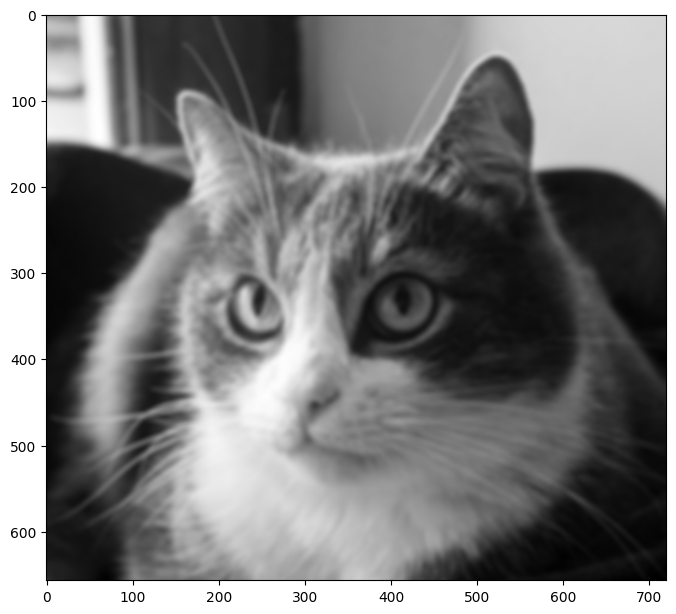

In [32]:
plt.figure(figsize=(8, 8))  # Создаёт новое окно для рисунка с размерами 8x8 дюймов. Это определяет размер отображаемого изображения на экране.
plt.imshow(np.abs(out_img), cmap='gray')  # Отображает изображение из массива out_img.
# np.abs(out_img) — берёт абсолютное значение каждого элемента массива, чтобы все значения были неотрицательными (нужно, если данные могут быть комплексными или отрицательными).
# cmap='gray' — задаёт цветовую карту в оттенках серого, то есть изображение будет отображено в черно-белой гамме.


## Загрузка цветного изображения

In [33]:
# Считаваем изображение из файла 'cat-color.png' в переменную img
# imageio.imread() загружает изображение в виде массива чисел (пикселей)
img = imageio.imread('cat-color.png')

# Преобразуем тип данных массива img в 32-битный float (числа с плавающей точкой)
# Это нужно, чтобы работать с изображением в диапазоне [0, 1], а не [0, 255]
# Делим все значения пикселей на 255, чтобы нормализовать их
img = img.astype(np.float32) / 255.

# Выводим форму массива img — это кортеж из трех чисел:
# (высота изображения, ширина изображения, количество цветовых каналов)
print(img.shape)


(667, 730, 3)


/tmp/ipython-input-33-1509938235.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('cat-color.png')


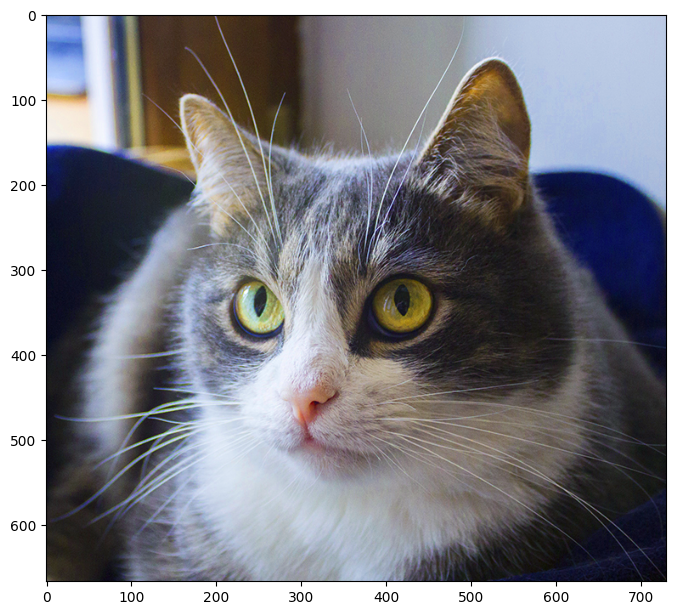

In [34]:
# Этот код рисует изображение с помощью библиотеки matplotlib

plt.figure(figsize=(8, 8)) #— создаёт новое окно для рисунка (фигуру) размером 8 на 8 дюймов.
# Размер влияет на то, насколько большое будет отображаемое изображение на экране или в блокноте.

plt.imshow(img) #— отображает изображение, которое хранится в переменной img.
# img — это обычно массив с пикселями изображения, например, загруженное фото.
# Функция imshow показывает картинку внутри текущей фигуры.

# В итоге этот код просто показывает изображение img в окне размером 8x8 дюймов.


## Свёртка цветного изобрежения
Двумерная свёртка применяется поканально.

In [35]:
%%time

out_img = []  # Создаем пустой список для хранения результатов свертки по каждому цветовому каналу

for c in range(3):  # Проходим по трем каналам изображения (обычно RGB: 0 - красный, 1 - зеленый, 2 - синий)
    # Для каждого канала применяем двумерную корреляцию (свёртку) с фильтром w
    # img[:,:,c] — это срез исходного изображения по текущему каналу
    # scipy.signal.correlate2d — функция из библиотеки scipy для корреляции двух 2D матриц
    # mode='valid' — значит, что результат будет только там, где фильтр полностью наложен на изображение, без обрезков по краям
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))

# np.stack объединяет список 2D массивов (для каждого канала) в один 3D массив по третьему измерению (цветовой канал)
out_img = np.stack(out_img, axis=2)


CPU times: user 650 ms, sys: 1.86 ms, total: 652 ms
Wall time: 658 ms


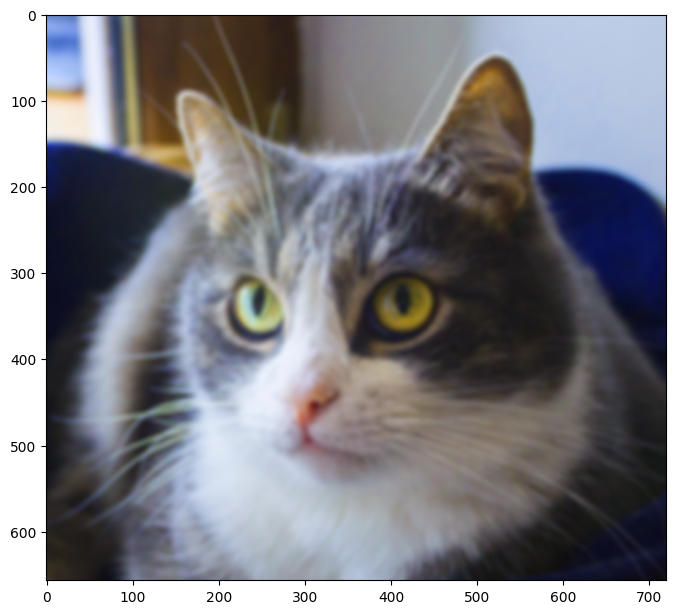

In [36]:
plt.figure(figsize=(8, 8))  # Создаёт новое окно для рисунка размером 8x8 дюймов.
                            # Это задаёт размер изображения, которое будет отображаться.

plt.imshow(out_img)         # Отображает изображение, которое хранится в переменной out_img.
                            # out_img — это массив пикселей (например, картинка или результат обработки),
                            # plt.imshow визуализирует этот массив как картинку.
